# clustering

In [10]:
import pandas as pd
data = pd.read_excel('/content/EastWestAirlines.xlsx',sheet_name  = 'data')
data.head(10)

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
5,6,16420,0,1,1,1,0,0,0,0,6942,0
6,7,84914,0,3,1,1,27482,25,0,0,6994,0
7,8,20856,0,1,1,1,5250,4,250,1,6938,1
8,9,443003,0,3,2,1,1753,43,3850,12,6948,1
9,10,104860,0,3,1,1,28426,28,1150,3,6931,1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


The dataset have only integer(int) data type.It is good for not changing the data type

In [12]:
data.isnull().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

There are no null values in the data set

<Axes: >

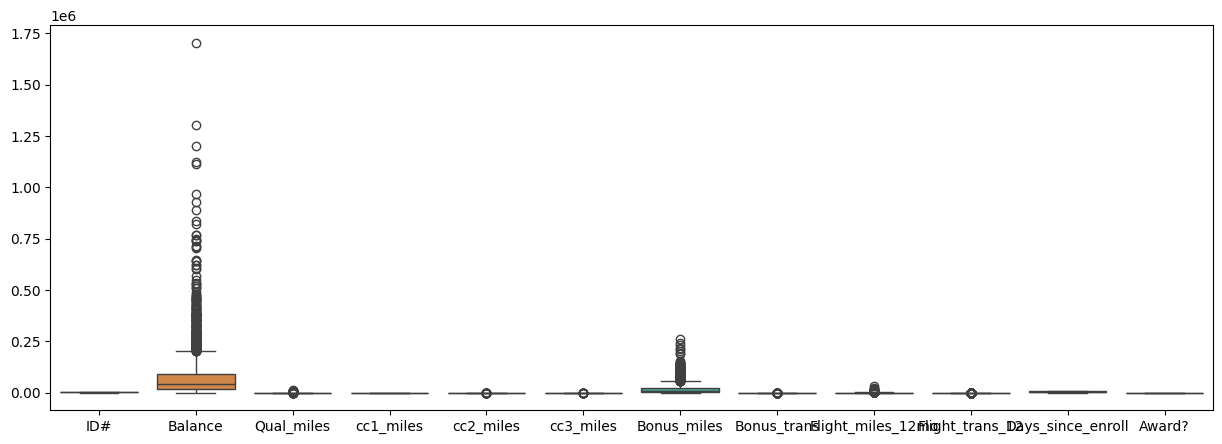

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (15,5))
sns.boxplot(data)

In [14]:
data['Balance'].value_counts()

Balance
1000     10
500       5
2000      5
1500      4
5000      3
         ..
9554      1
30130     1
12665     1
9860      1
3016      1
Name: count, Length: 3904, dtype: int64

In [15]:
data['Qual_miles'].value_counts()

Qual_miles
0       3773
1000      17
500       15
967        4
888        4
        ... 
4116       1
1388       1
1896       1
3692       1
1005       1
Name: count, Length: 164, dtype: int64

In [16]:

def remove_outliers(df):
  numerical_columns = df.select_dtypes(include = ['int64']).columns

  for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    Upper_limit = Q3 + (1.5 * IQR)
    Lower_limit = Q1 - (1.5 * IQR)

    df = df[(df[col] >= Lower_limit) & (df[col] <= Upper_limit)]
  return df

data_new = remove_outliers(data)
data_new

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3990,4013,11310,0,1,1,1,5021,2,0,0,1409,0
3991,4014,39142,0,3,1,1,14981,28,0,0,1408,0
3992,4015,11181,0,1,1,1,929,12,0,0,1407,0
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0


<Axes: >

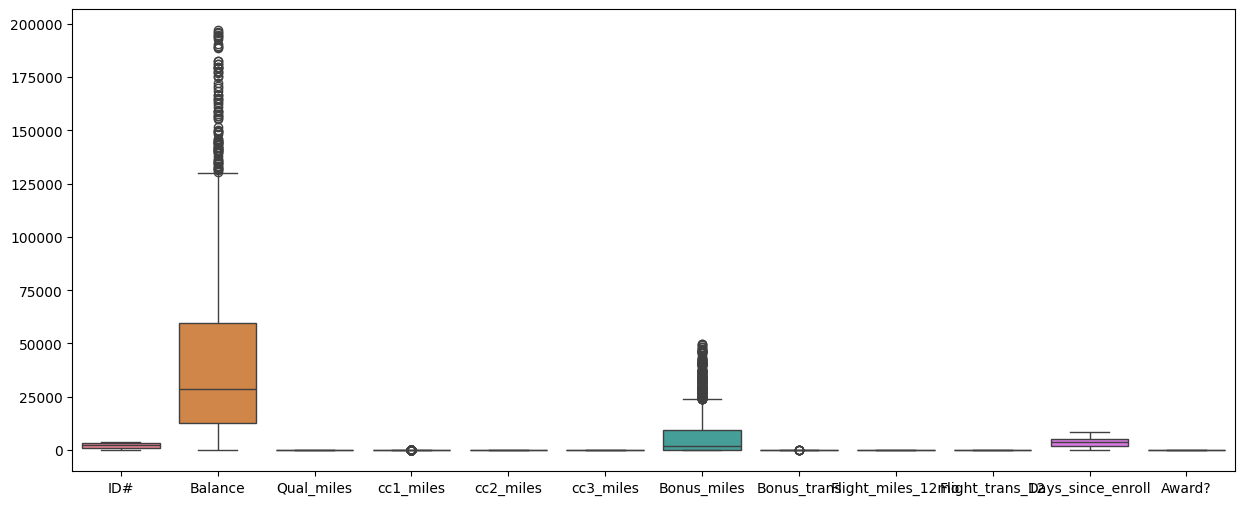

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (15,6))
sns.boxplot(data_new)

# standardization

In [18]:
from sklearn.preprocessing import StandardScaler
scaled_data = StandardScaler()
df = scaled_data.fit_transform(data_new)
df

array([[-1.8920833 , -0.35172951,  0.        , ...,  0.        ,
         1.56649934,  0.        ],
       [-1.89123029, -0.57351045,  0.        , ...,  0.        ,
         1.5511899 ,  0.        ],
       [-1.89037728, -0.02248486,  0.        , ...,  0.        ,
         1.58276562,  0.        ],
       ...,
       [ 1.53191714, -0.7744566 ,  0.        , ...,  0.        ,
        -1.1093033 ,  0.        ],
       [ 1.53277016, -0.95406951,  0.        , ...,  0.        ,
        -1.1140875 ,  0.        ],
       [ 1.53703523, -0.9779448 ,  0.        , ...,  0.        ,
        -1.11360908,  0.        ]])

In [19]:
new_df = pd.DataFrame(df,columns = ['ID#',	'Balance'	,'Qual_miles',	'cc1_miles',	'cc2_miles',	'cc3_miles',	'Bonus_miles','Bonus_trans'	,'Flight_miles_12mo'	,'Flight_trans_12',	'Days_since_enroll',	'Award?'])
new_df


,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,-1.892083,-0.351730,0.0,-0.571271,0.0,0.0,-0.663819,-0.922006,0.0,0.0,1.566499,0.0
1,-1.891230,-0.573510,0.0,-0.571271,0.0,0.0,-0.659907,-0.784064,0.0,0.0,1.551190,0.0
2,-1.890377,-0.022485,0.0,-0.571271,0.0,0.0,-0.287037,-0.508181,0.0,0.0,1.582766,0.0
3,-1.889524,-0.684862,0.0,-0.571271,0.0,0.0,-0.632715,-0.922006,0.0,0.0,1.543535,0.0
4,-1.887818,-0.643890,0.0,-0.571271,0.0,0.0,-0.680421,-1.059947,0.0,0.0,1.538751,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1780,1.530211,-0.771242,0.0,-0.571271,0.0,0.0,-0.201357,-0.784064,0.0,0.0,-1.108346,0.0
1781,1.531064,-0.077612,0.0,1.522607,0.0,0.0,0.748946,2.802415,0.0,0.0,-1.108825,0.0
1782,1.531917,-0.774457,0.0,-0.571271,0.0,0.0,-0.591783,0.595351,0.0,0.0,-1.109303,0.0
1783,1.532770,-0.954070,0.0,-0.571271,0.0,0.0,-0.645595,-0.646123,0.0,0.0,-1.114087,0.0


<Axes: >

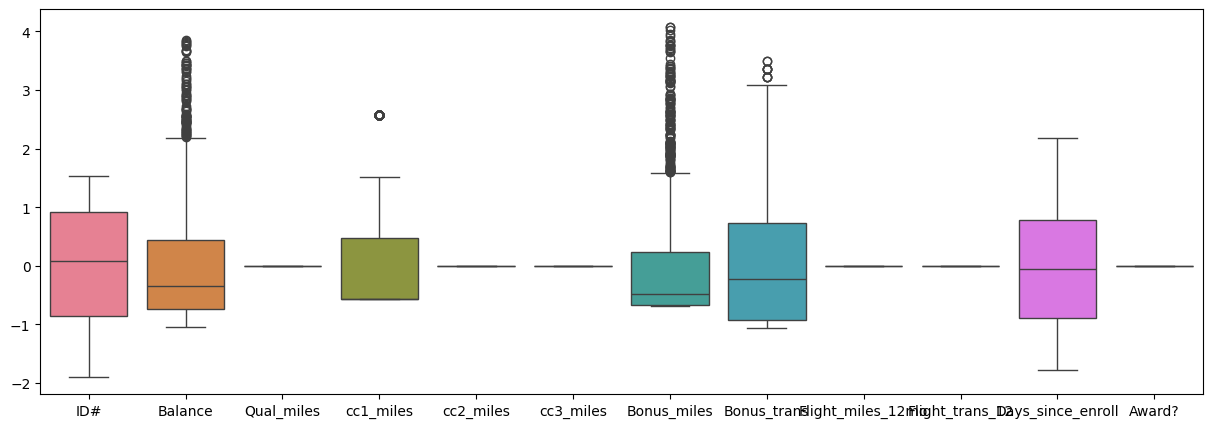

In [20]:
plt.figure(figsize = (15,5))
sns.boxplot(new_df)

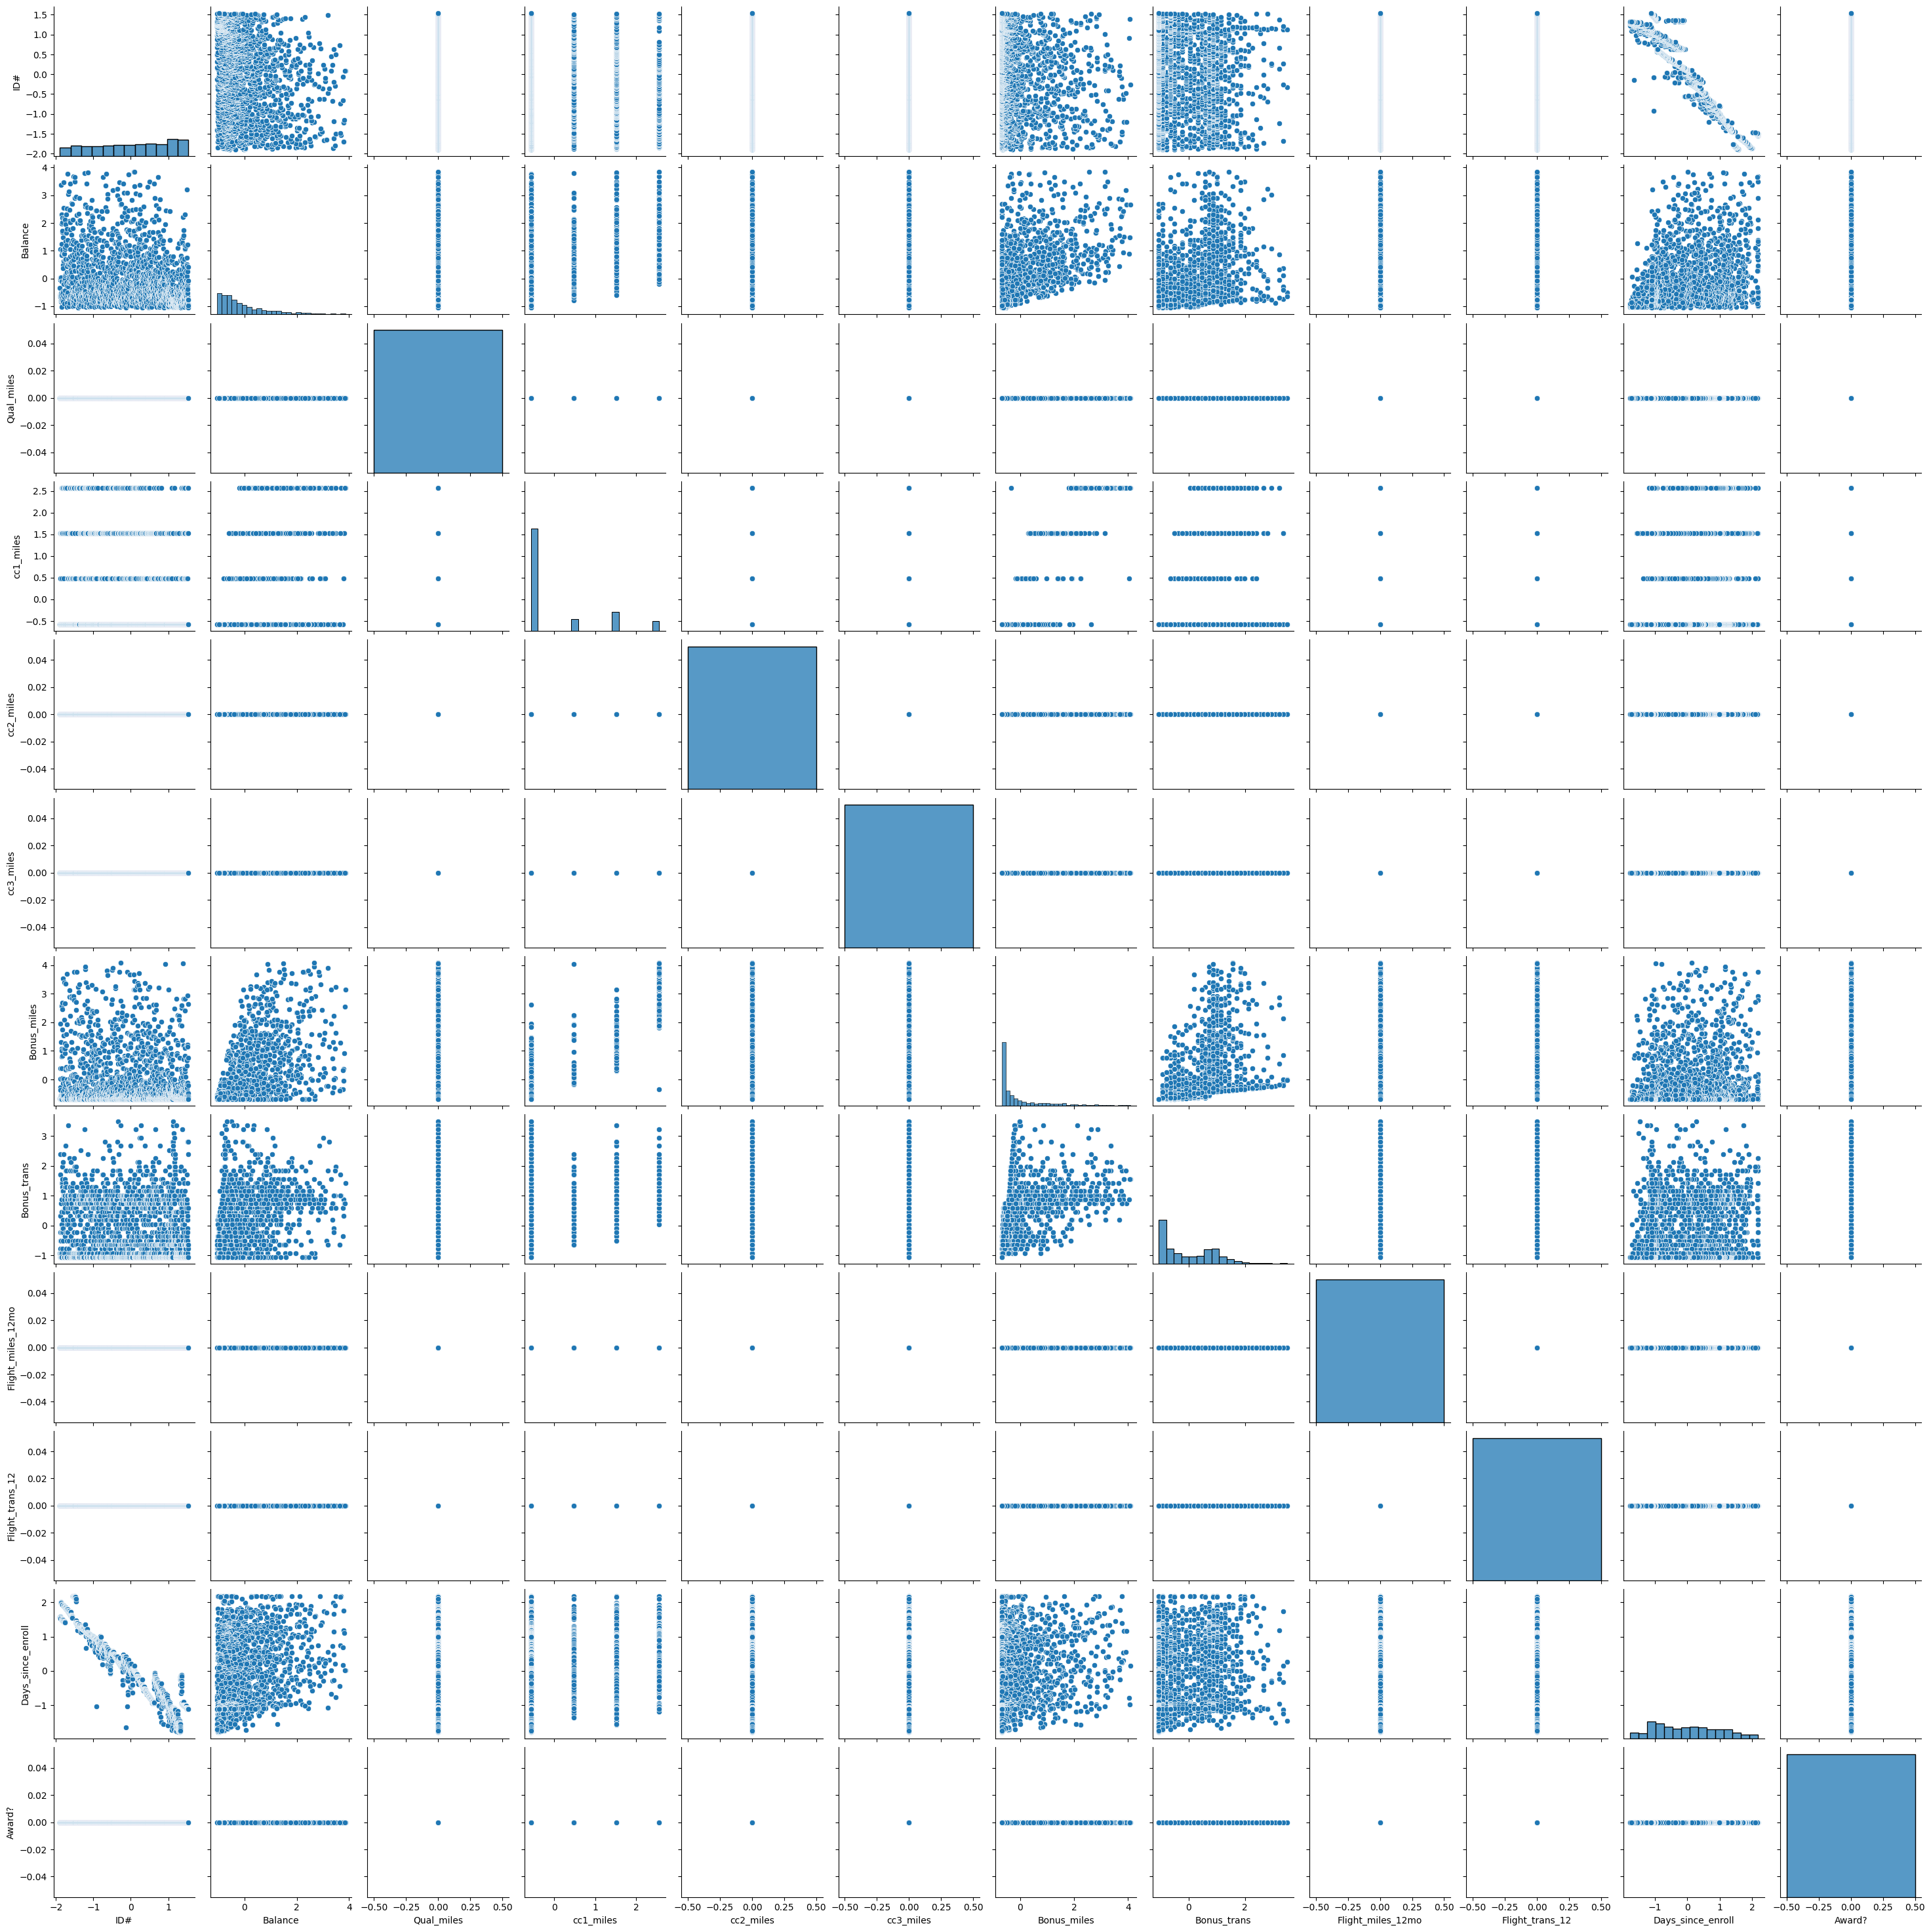

In [21]:
import seaborn as sns
sns.pairplot(new_df)

In [22]:
new_df.corr()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,1.000000,-0.249524,NaN,-0.177044,NaN,NaN,-0.140135,-0.088499,NaN,NaN,-0.963140,NaN
Balance,-0.249524,1.000000,NaN,0.586241,NaN,NaN,0.580243,0.432786,NaN,NaN,0.271885,NaN
Qual_miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc1_miles,-0.177044,0.586241,NaN,1.000000,NaN,NaN,0.892161,0.581852,NaN,NaN,0.183133,NaN
cc2_miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cc3_miles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Bonus_miles,-0.140135,0.580243,NaN,0.892161,NaN,NaN,1.000000,0.604022,NaN,NaN,0.145044,NaN
Bonus_trans,-0.088499,0.432786,NaN,0.581852,NaN,NaN,0.604022,1.000000,NaN,NaN,0.102708,NaN
Flight_miles_12mo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Flight_trans_12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


array([[<Axes: title={'center': 'ID#'}>,
        <Axes: title={'center': 'Balance'}>,
        <Axes: title={'center': 'Qual_miles'}>],
       [<Axes: title={'center': 'cc1_miles'}>,
        <Axes: title={'center': 'cc2_miles'}>,
        <Axes: title={'center': 'cc3_miles'}>],
       [<Axes: title={'center': 'Bonus_miles'}>,
        <Axes: title={'center': 'Bonus_trans'}>,
        <Axes: title={'center': 'Flight_miles_12mo'}>],
       [<Axes: title={'center': 'Flight_trans_12'}>,
        <Axes: title={'center': 'Days_since_enroll'}>,
        <Axes: title={'center': 'Award?'}>]], dtype=object)

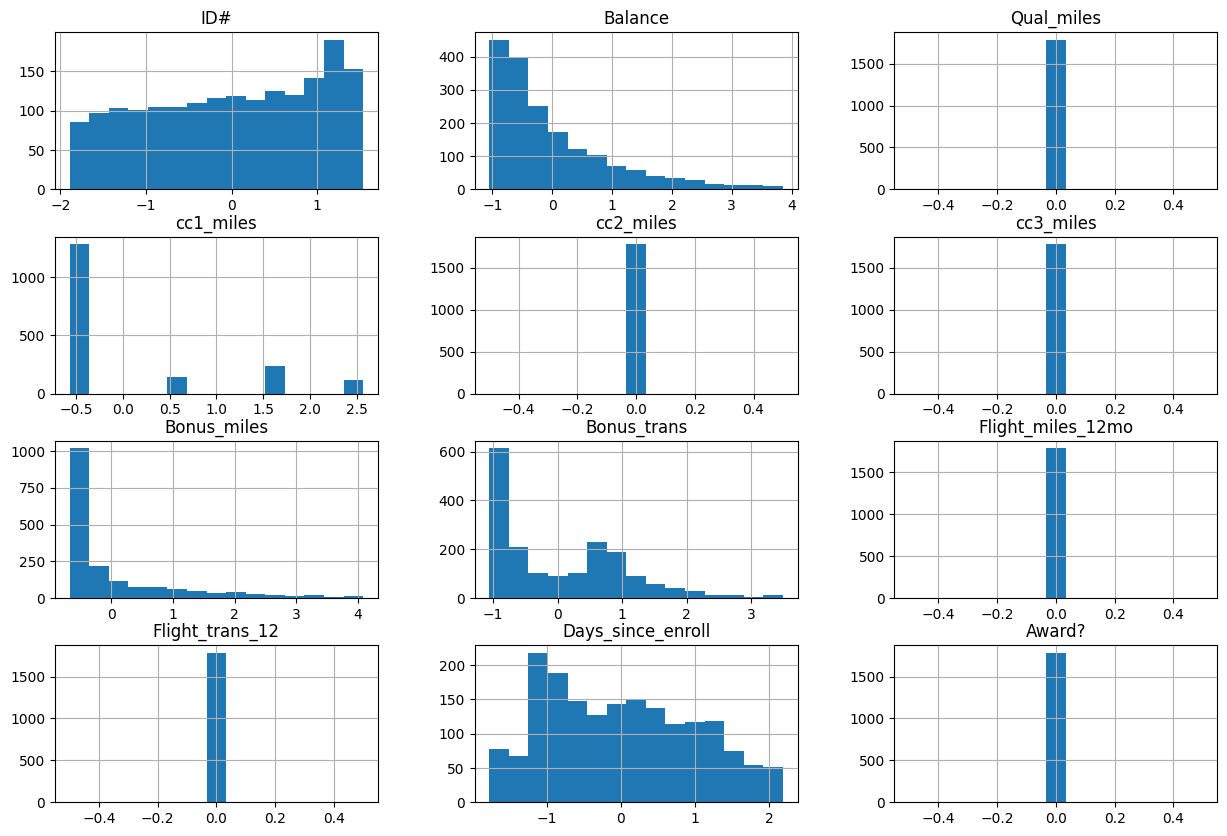

In [23]:
new_df.hist(bins = 15 , figsize = (15,10))

<Axes: >

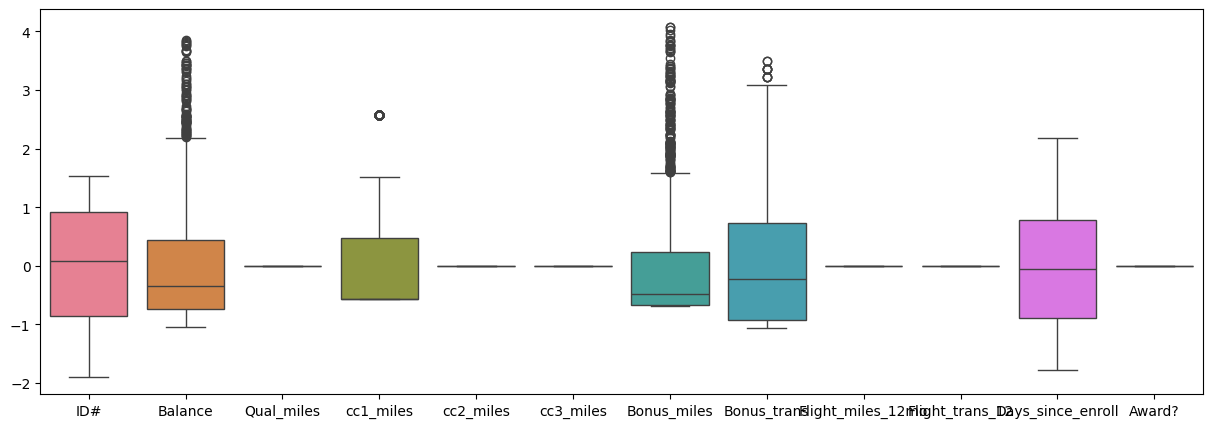

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize = (15,5))
sns.boxplot(new_df)

In [25]:
data.corr()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
ID#,1.000000,-0.243737,-0.019374,-0.224465,0.020291,-0.014707,-0.203012,-0.146915,-0.031013,-0.052096,-0.964988,-0.177901
Balance,-0.243737,1.000000,0.108722,0.338344,-0.008804,0.035243,0.403487,0.324935,0.217551,0.255700,0.263129,0.178494
Qual_miles,-0.019374,0.108722,1.000000,0.007931,-0.013923,-0.007779,0.031021,0.050725,0.126774,0.144004,0.017312,0.095256
cc1_miles,-0.224465,0.338344,0.007931,1.000000,-0.068223,0.060555,0.825200,0.608943,0.037370,0.041333,0.230849,0.335457
cc2_miles,0.020291,-0.008804,-0.013923,-0.068223,1.000000,-0.006166,-0.003969,0.064399,0.010598,0.028284,-0.005807,0.005332
cc3_miles,-0.014707,0.035243,-0.007779,0.060555,-0.006166,1.000000,0.204134,0.097313,-0.001777,-0.001117,0.010832,0.023484
Bonus_miles,-0.203012,0.403487,0.031021,0.825200,-0.003969,0.204134,1.000000,0.603180,0.183536,0.185261,0.210397,0.373506
Bonus_trans,-0.146915,0.324935,0.050725,0.608943,0.064399,0.097313,0.603180,1.000000,0.377216,0.432364,0.161262,0.333893
Flight_miles_12mo,-0.031013,0.217551,0.126774,0.037370,0.010598,-0.001777,0.183536,0.377216,1.000000,0.869193,0.037271,0.217715
Flight_trans_12,-0.052096,0.255700,0.144004,0.041333,0.028284,-0.001117,0.185261,0.432364,0.869193,1.000000,0.059260,0.247909


<Axes: >

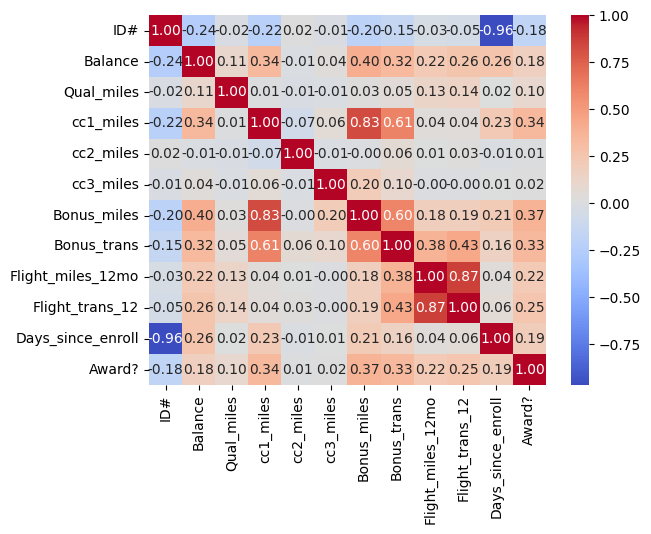

In [26]:
#correlation
corr_matrix = data.corr()
sns.heatmap(corr_matrix,annot = True,cmap = 'coolwarm',fmt= '.2f')

<Axes: >

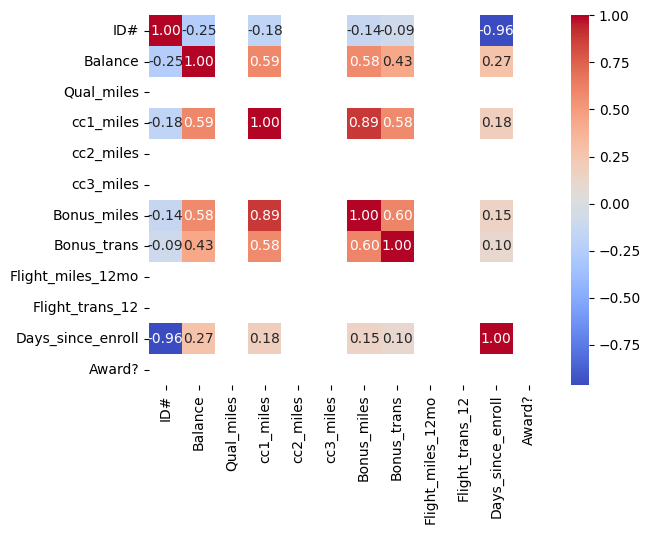

In [27]:
#correlation
corr_matrix = new_df.corr()
sns.heatmap(corr_matrix,annot = True,cmap = 'coolwarm',fmt= '.2f')

# implementing clustering algorithms

1. Hierarical clustering

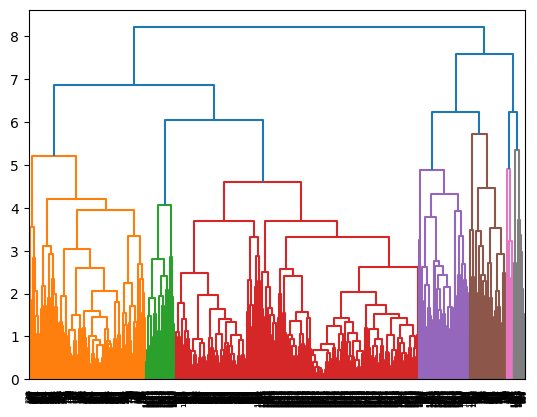

In [28]:
import scipy.cluster.hierarchy as sch
#plt.figure(figsize = (15,5))
dendo = sch.dendrogram(sch.linkage(new_df ,method = 'complete'))

In [29]:
from sklearn.cluster import AgglomerativeClustering
HC = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean' , linkage = 'complete')
HC


AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=4)

In [30]:
y_hc = HC.fit_predict(new_df)
y_hc

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([3, 3, 3, ..., 1, 1, 1])

In [31]:
data_new['h_clustered'] = y_hc
data_new

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clustered
0,1,28143,0,1,1,1,174,1,0,0,7000,0,3
1,2,19244,0,1,1,1,215,2,0,0,6968,0,3
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,3
3,4,14776,0,1,1,1,500,1,0,0,6952,0,3
5,6,16420,0,1,1,1,0,0,0,0,6942,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,4013,11310,0,1,1,1,5021,2,0,0,1409,0,1
3991,4014,39142,0,3,1,1,14981,28,0,0,1408,0,1
3992,4015,11181,0,1,1,1,929,12,0,0,1407,0,1
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0,1


In [32]:
data_new[data_new['h_clustered'] == 0]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clustered
30,31,177926,0,3,1,1,20797,13,0,0,7886,0,0
110,113,181019,0,3,1,1,18415,15,0,0,7714,0,0
116,119,143967,0,2,1,1,7346,11,0,0,7689,0,0
195,199,134601,0,1,1,1,0,0,0,0,7493,0,0
224,228,193976,0,3,1,1,10849,14,0,0,7416,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3299,3322,140914,0,1,1,1,0,0,0,0,1791,0,0
3421,3444,139982,0,1,1,1,14500,6,0,0,1430,0,0
3836,3859,130595,0,1,1,1,0,0,0,0,1677,0,0
3892,3915,134882,0,3,1,1,15717,14,0,0,1597,0,0


In [33]:
data_new[data_new['h_clustered']==1]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clustered
1092,1104,19960,0,1,1,1,0,0,0,0,4896,0,1
1129,1141,1625,0,1,1,1,1375,4,0,0,1547,0,1
1142,1154,8516,0,1,1,1,0,0,0,0,5566,0,1
1179,1191,34450,0,1,1,1,26996,7,0,0,5566,0,1
1189,1201,6584,0,1,1,1,0,0,0,0,5118,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,4013,11310,0,1,1,1,5021,2,0,0,1409,0,1
3991,4014,39142,0,3,1,1,14981,28,0,0,1408,0,1
3992,4015,11181,0,1,1,1,929,12,0,0,1407,0,1
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0,1


In [34]:
data_new[data_new['h_clustered'] == 2]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clustered
6,7,84914,0,3,1,1,27482,25,0,0,6994,0,2
44,45,121260,0,3,1,1,18493,18,0,0,7808,0,2
56,57,75971,0,4,1,1,34339,14,0,0,6869,0,2
58,59,38077,0,3,1,1,34024,8,0,0,6837,0,2
60,61,134457,0,3,1,1,15588,14,0,0,6861,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3899,3922,90666,0,4,1,1,32474,14,0,0,1582,0,2
3945,3968,62645,0,1,1,1,19602,11,0,0,1474,0,2
3948,3971,35509,0,3,1,1,14204,13,0,0,1486,0,2
3966,3989,91605,0,4,1,1,37840,18,0,0,1444,0,2


In [35]:
data_new[data_new['h_clustered'] == 3]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clustered
0,1,28143,0,1,1,1,174,1,0,0,7000,0,3
1,2,19244,0,1,1,1,215,2,0,0,6968,0,3
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,3
3,4,14776,0,1,1,1,500,1,0,0,6952,0,3
5,6,16420,0,1,1,1,0,0,0,0,6942,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,2353,40420,0,2,1,1,8649,14,0,0,3651,0,3
2361,2379,23139,0,2,1,1,8156,14,0,0,3578,0,3
2370,2388,17920,0,1,1,1,3250,18,0,0,3546,0,3
2382,2400,14075,0,1,1,1,4286,15,0,0,3513,0,3


In [36]:
data_new.groupby('h_clustered').mean()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
h_clustered,,,,,,,,,,,,
0,1906.615385,153853.846154,0.0,1.830769,1.0,1.0,9764.215385,11.600000,0.0,0.0,4406.430769,0.0
1,2898.784772,24612.648731,0.0,1.065990,1.0,1.0,2374.742132,5.017259,0.0,0.0,2514.531980,0.0
2,1963.066667,83034.219048,0.0,3.311111,1.0,1.0,25800.676190,15.422222,0.0,0.0,4190.615873,0.0
3,865.521429,35779.988095,0.0,1.302381,1.0,1.0,3877.476190,7.528571,0.0,0.0,6112.059524,0.0


In [37]:
data_new['h_clustered'].mean()

1.6106442577030813

2. k -means clustering

scaled data = new_df

old data = data

remove outlier data = data_new

Elbow chart

In [38]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

[10710.000000000004, 6591.161426043799, 4582.430763858255, 3917.568867772108, 3457.9110603890776, 3105.5699943585105, 2783.9490070628294, 2533.5430382429245, 2330.569796746884]


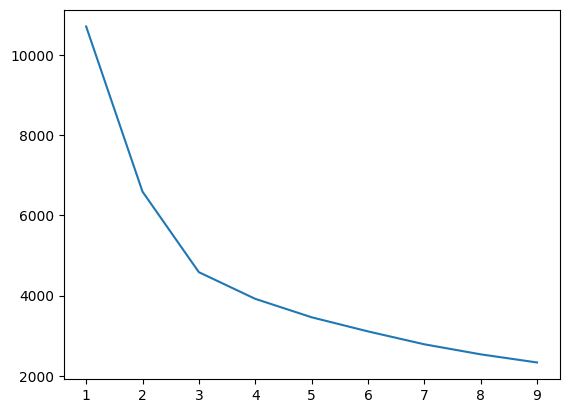

In [39]:
#wcss (within cluster sum of squares)
wcss = []
for i in range(1,10):
  kmeans = KMeans(n_clusters = i , random_state = 0 )
  kmeans.fit(new_df)
  wcss.append(kmeans.inertia_) #inertia = variance
print(wcss)
plt.plot(range(1,10),wcss)


In [40]:
k_cluster= KMeans(n_clusters = 4 , random_state = 0)
kmc = k_cluster.fit(new_df)
kmc

KMeans(n_clusters=4, random_state=0)

In [41]:
y_kmc = kmc.fit_predict(new_df)
y_kmc

array([3, 3, 3, ..., 1, 1, 1], dtype=int32)

In [42]:
data_new['k_clustered'] = y_kmc

In [43]:
data_new

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clustered,k_clustered
0,1,28143,0,1,1,1,174,1,0,0,7000,0,3,3
1,2,19244,0,1,1,1,215,2,0,0,6968,0,3,3
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,3,3
3,4,14776,0,1,1,1,500,1,0,0,6952,0,3,3
5,6,16420,0,1,1,1,0,0,0,0,6942,0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,4013,11310,0,1,1,1,5021,2,0,0,1409,0,1,1
3991,4014,39142,0,3,1,1,14981,28,0,0,1408,0,1,0
3992,4015,11181,0,1,1,1,929,12,0,0,1407,0,1,1
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0,1,1


3. DBscan

In [44]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = 3 , min_samples =4)
dbscan.fit(new_df)

DBSCAN(eps=3, min_samples=4)

In [45]:
y_dbscan = dbscan.fit_predict(new_df)
y_dbscan

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
data_new['dbs_clustered'] = y_dbscan

In [47]:
data_new

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clustered,k_clustered,dbs_clustered
0,1,28143,0,1,1,1,174,1,0,0,7000,0,3,3,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,3,3,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0,3,3,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,3,3,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3990,4013,11310,0,1,1,1,5021,2,0,0,1409,0,1,1,0
3991,4014,39142,0,3,1,1,14981,28,0,0,1408,0,1,0,0
3992,4015,11181,0,1,1,1,929,12,0,0,1407,0,1,1,0
3993,4016,3974,0,1,1,1,365,3,0,0,1397,0,1,1,0


In [48]:
data_new['h_clustered'].value_counts()

h_clustered
1    985
3    420
2    315
0     65
Name: count, dtype: int64

In [49]:
data_new['k_clustered'].value_counts()

k_clustered
1    601
3    562
2    325
0    297
Name: count, dtype: int64

In [50]:
data_new['dbs_clustered'].value_counts()

dbs_clustered
0    1785
Name: count, dtype: int64

In [51]:
from sklearn import metrics
from sklearn.metrics import silhouette_score
hc_s_c = metrics.silhouette_score(new_df, y_hc)
hc_s_c

0.3205127561111654

In [52]:
kmc_s_c = metrics.silhouette_score(new_df, y_kmc)
kmc_s_c

0.34202471332383705

<Axes: xlabel='Balance', ylabel='Bonus_miles'>

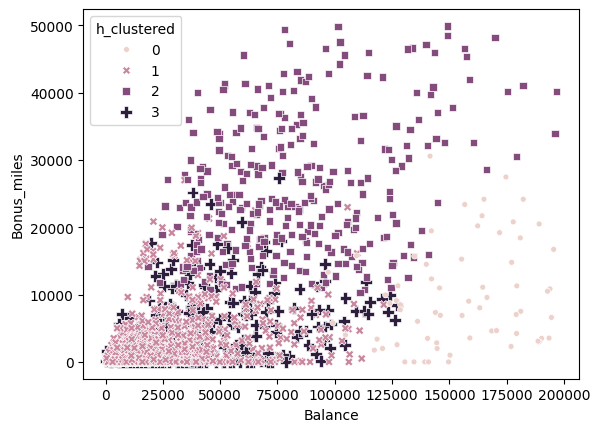

In [53]:
import seaborn as sns
sns.scatterplot(data = data_new , x = 'Balance' ,y = 'Bonus_miles' , hue = 'h_clustered' , style = 'h_clustered', size = "h_clustered")

<Axes: xlabel='Balance', ylabel='Bonus_miles'>

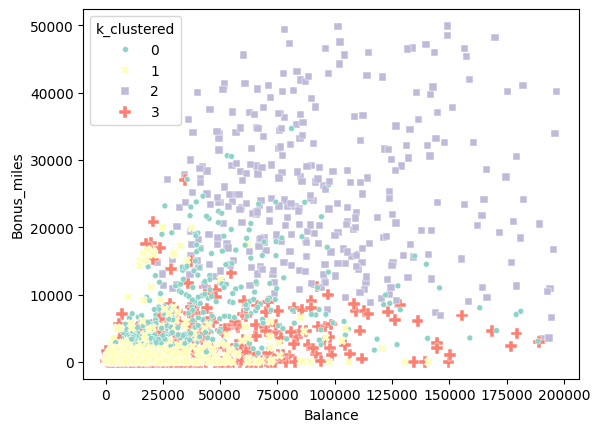

In [58]:
import seaborn as sns
sns.scatterplot(data = data_new , x = 'Balance' ,y = 'Bonus_miles' , hue = 'k_clustered' , style = 'k_clustered', size = "k_clustered",palette = 'Set3')

<Axes: xlabel='Balance', ylabel='Bonus_miles'>

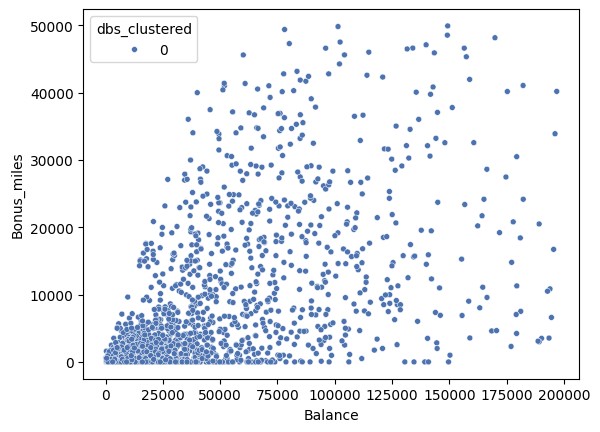

In [59]:
import seaborn as sns
sns.scatterplot(data = data_new , x = 'Balance' ,y = 'Bonus_miles' , hue = 'dbs_clustered' , style = 'dbs_clustered', size = "dbs_clustered" , palette = 'deep')

<Axes: >

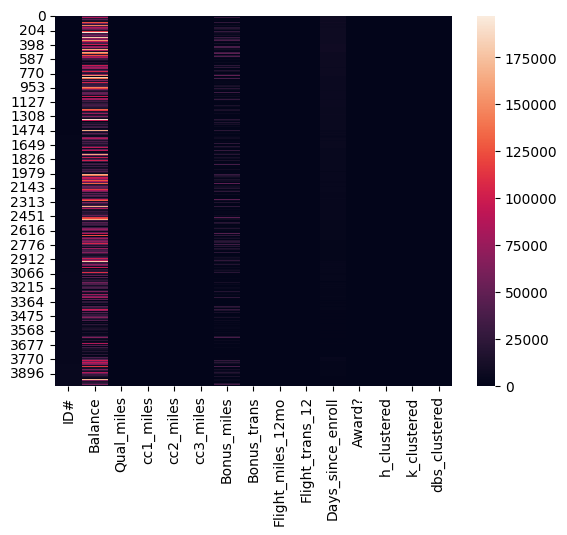

In [54]:
sns.heatmap(data_new)